---

# **Pag** | Seleção de atributos
Aluno [Julio Cesar](https://www.linkedin.com/in/julio-pk-56b209205/)

---

A forma como o aprendizado de máquina se desenvolve está diretamente relacionado com a qualidade dos dados entregue a um modelo de Machine Learning. Além da parte de limpeza e pré-processamento, é dever do cientista de dados extrair a melhor performance possível de seus algoritmos.

A seleção de features consiste na avaliação de todas as características de uma base de dados de modo a selecionar as melhores para determinada aplicação de Machine Learning e nesse caso irei utilizar apenas Variance Threshold.

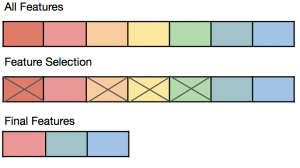

# feature selection VarianceThreshold

In [22]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('credit_data.csv')

In [5]:
dataset.dropna(inplace=True)

In [ ]:
dataset.head()

* A Seleção de atributos relevantes, deve ser considerado apenas dados que estão na mesma escala com o Desvio padrão proximo. ( desconsiderando aqueles com 0.0) 

* Em momentos que o treinamento envolve um numero grande de colunas, a relevancia deve ser filtrada descartando os atributos abaixo da media geral. 

In [7]:
dataset.describe()

,i#clientid,income,age,loan,c#default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
X = dataset.iloc[:, 1:4].values

In [9]:
y = dataset.iloc[:, 4].values

* Abreviando a escala de numeros para 0 / 1

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X

array([[0.9231759 , 0.95743135, 0.58883739],
       [0.28812165, 0.86378597, 0.47682695],
       [0.74633429, 0.99257918, 0.58262011],
       ...,
       [0.48612202, 0.69109837, 0.40112895],
       [0.47500998, 1.        , 0.1177903 ],
       [0.98881367, 0.93282208, 0.53597028]])



> Nota: abaixo está a variancia para definir a relevancia dos atributos (as 3 colunas), vamos escolher o menor ou a media de todas.



In [16]:
np.var(X[0]), np.var(X[1]), np.var(X[2])

(0.027646353650092187, 0.05741515340722347, 0.028389480276199003)

## VarianceThreshold 

In [17]:
from sklearn.feature_selection import VarianceThreshold 

selecao = VarianceThreshold(threshold=0.027)
X_novo = selecao.fit_transform(X)

In [18]:
X_novo

array([[0.9231759 , 0.58883739],
       [0.28812165, 0.47682695],
       [0.74633429, 0.58262011],
       ...,
       [0.48612202, 0.40112895],
       [0.47500998, 0.1177903 ],
       [0.98881367, 0.53597028]])

* Considerando que os dados com menor variancia são descartaveis, no caso aplicamos o valor minimo para ser fatiado. porem, aqui a variancia dos atributos é muito proxima, então esse valor minimo não deve ser considerado como irrelevante.

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_sem_selecao = GaussianNB()
naive_sem_selecao.fit(X, y)

previsoes = naive_sem_selecao.predict(X)
accuracy_score(previsoes, y)

0.9253880821231848

In [21]:
naive_com_selecao = GaussianNB()
naive_sem_selecao = naive_sem_selecao.fit(X_novo, y)

previsoes = naive_sem_selecao.predict(X_novo)
accuracy_score(previsoes, y)

0.8472709063595393